 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [51]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [52]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
whale_returns_df.sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [53]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [54]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [55]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_returns_df.sort_index()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [56]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [57]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [58]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp500_history_df.sort_index()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [59]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [60]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")
sp500_history_df.dtypes

Close    float64
dtype: object

In [61]:
# Calculate Daily Returns
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [62]:
# Drop nulls
sp500_returns_df = sp500_returns_df.dropna()
sp500_returns_df.isnull().sum()

Close    0
dtype: int64

In [63]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df = sp500_returns_df.rename(columns = {"Close": "S&P 500"})
sp500_returns_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [64]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis="columns", join="inner")
returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

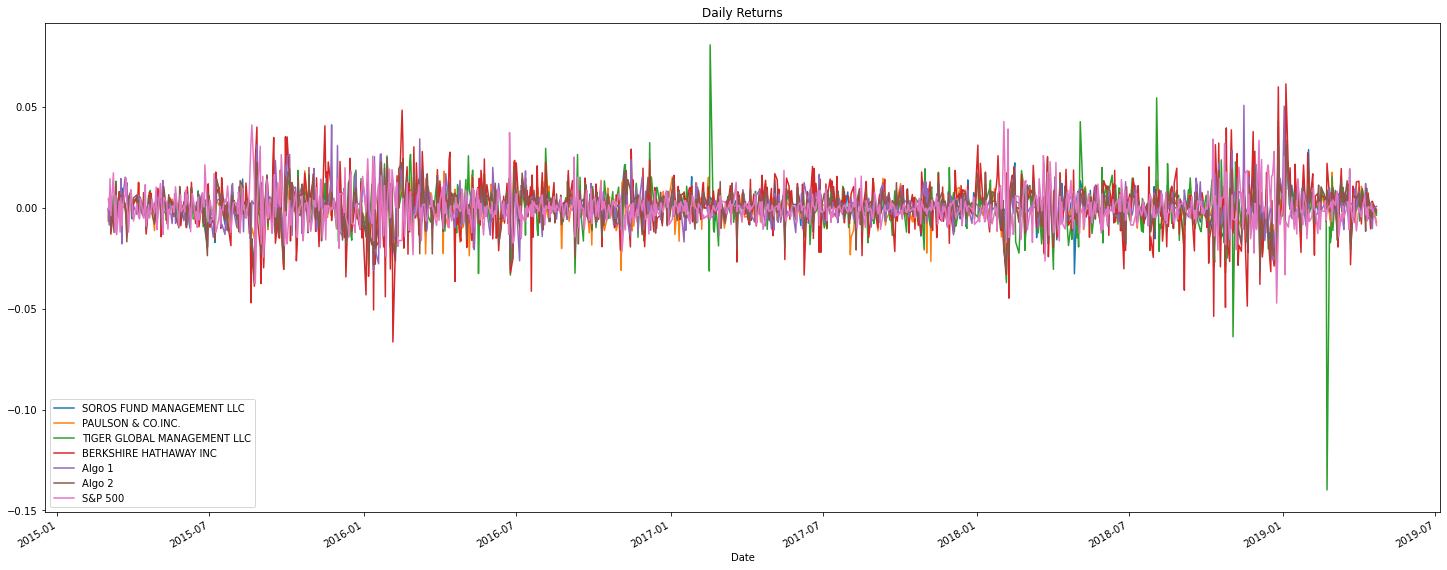

In [65]:
# Plot daily returns of all portfolios
plot_returns = returns_df.plot(figsize = (25,10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

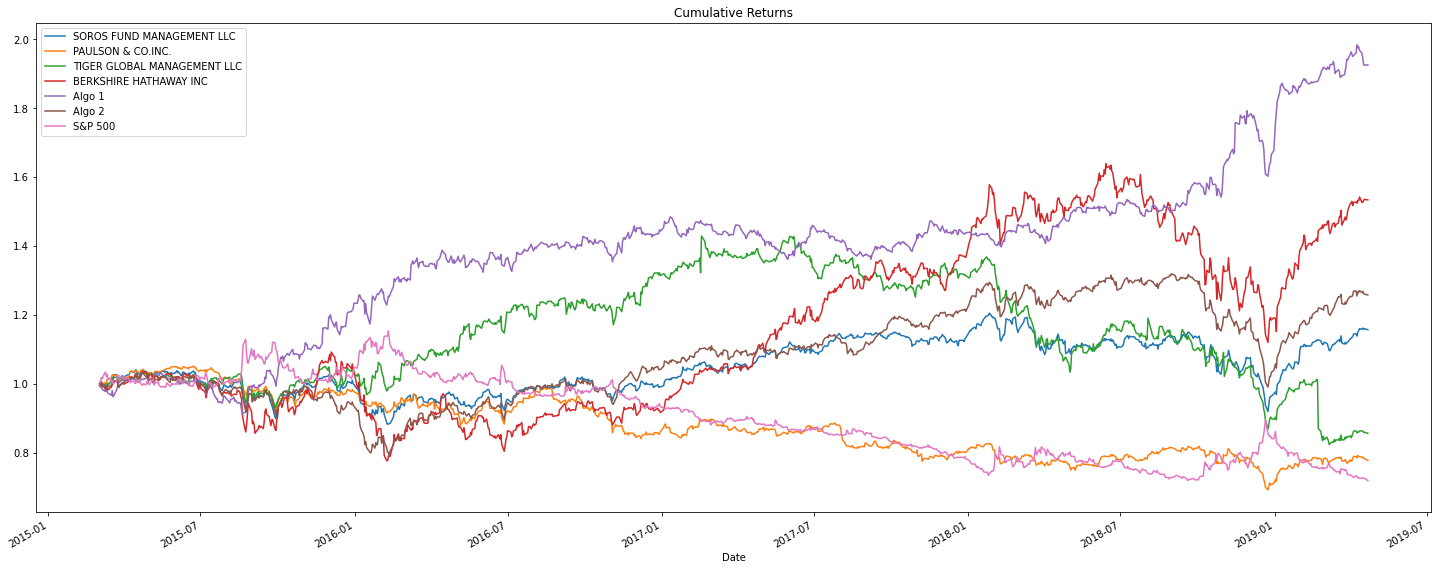

In [66]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + returns_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize = (25,10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


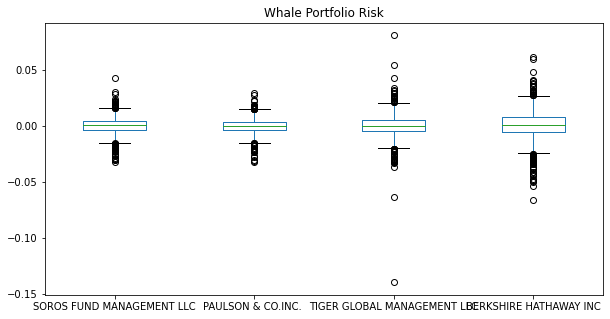

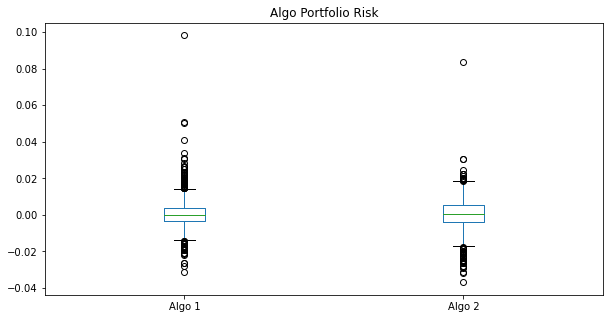

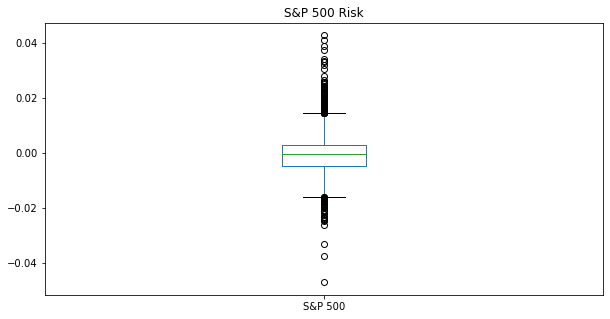

In [67]:
# Box plot to visually show risk
whale_box_plot = whale_returns_df.plot.box(figsize=(10,5), title="Whale Portfolio Risk")
algo_box_plot = algo_returns_df.plot.box(figsize=(10,5), title="Algo Portfolio Risk")
sp500_box_plot = sp500_returns_df.plot.box(figsize=(10,5), title= "S&P 500 Risk")

### Calculate Standard Deviations

In [68]:
# Calculate the daily standard deviations of all portfolios
returns_std = returns_df.std()
returns_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [69]:
# Calculate the daily standard deviation of S&P 500
sp500_std = sp500_returns_df.std()

# Determine which portfolios are riskier than the S&P 500
returns_std = returns_std.sort_values(ascending = False)
returns_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Calculate the Annualized Standard Deviation

In [70]:
## Calculate the annualized standard deviation (252 trading days)
annualized_std = returns_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

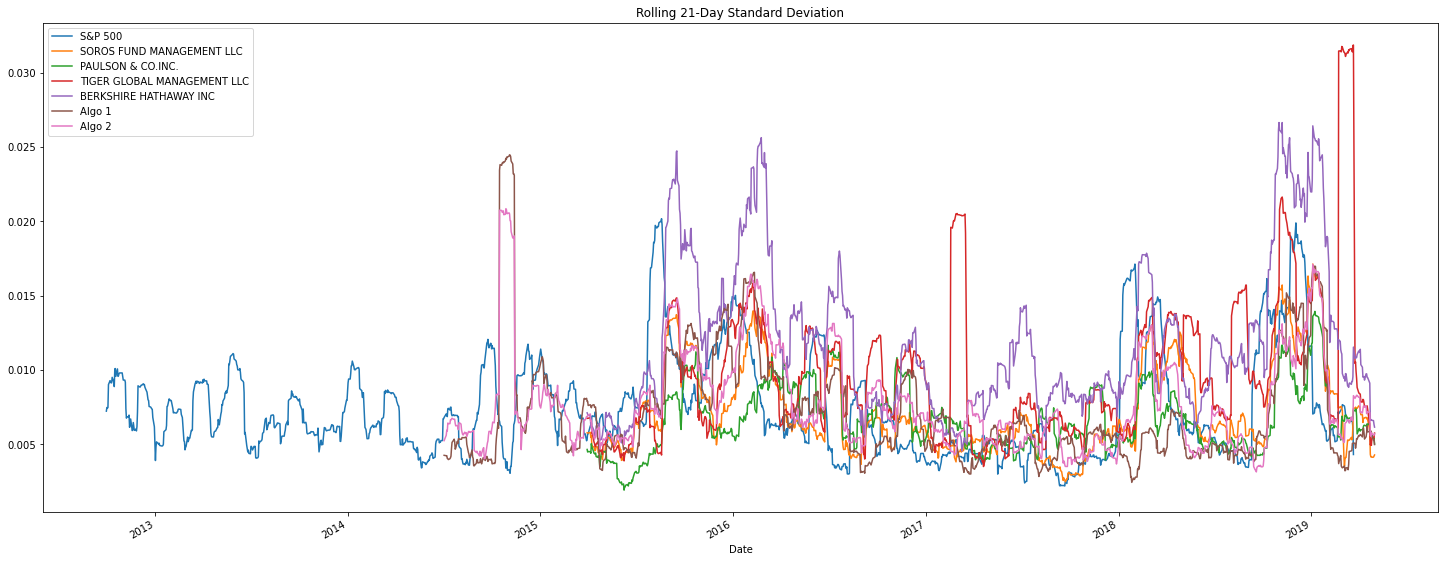

In [71]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp_rolling_std = sp500_returns_df.rolling(window=21).std()
whale_rolling_std = whale_returns_df.rolling(window=21).std()
algo_rolling_std = algo_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_rolling_std = sp_rolling_std.plot(figsize=(25,10), title = "Rolling 21-Day Standard Deviation")
whale_rolling_std.plot(ax=combined_rolling_std)
algo_rolling_std.plot(ax=combined_rolling_std)
combined_rolling_std.legend()

### Calculate and plot the correlation

In [72]:
# Calculate the correlation
returns_correlation = returns_df.corr()
# Display de correlation matrix
returns_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


[Text(0.5, 1.0, 'Returns Corrleation')]

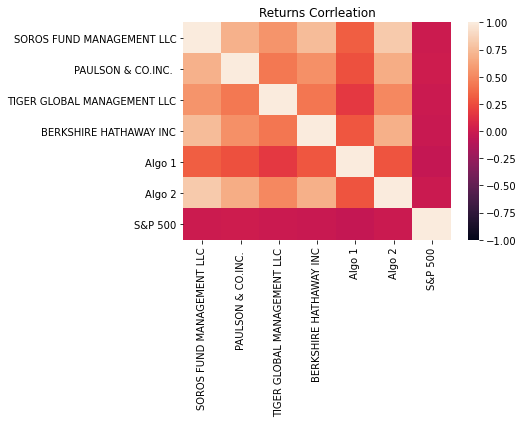

In [73]:
sns.heatmap(returns_correlation, vmin=-1, vmax=1).set(title="Returns Corrleation")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'60-Day Rolling Beta of Berkshire Hathaway Daily Returns vs. S&P 500 Daily Returns'}, xlabel='Date'>

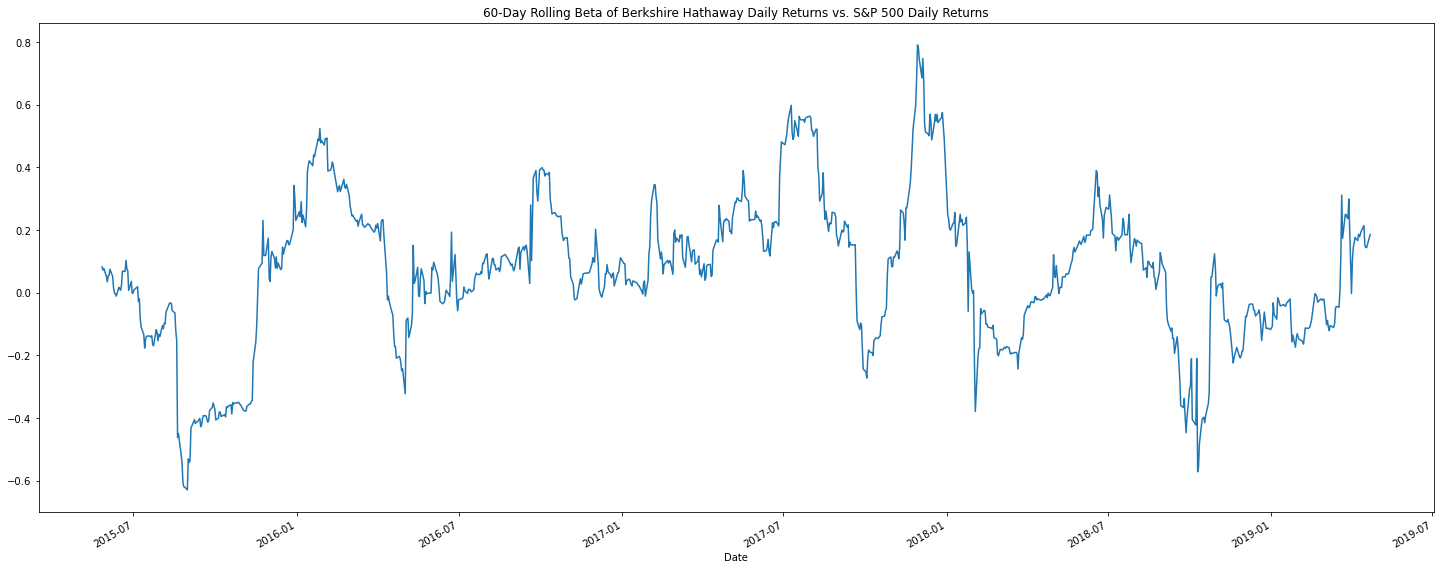

In [74]:
# Calculate covariance of a single portfolio
whale_cov = returns_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(returns_df["S&P 500"])

# # Calculate variance of S&P 500
sp500_var = returns_df["S&P 500"].rolling(window=60).var()

# Computing beta
whale_sp500_beta = whale_cov/sp500_var
# Plot beta trend
whale_sp500_beta.plot(figsize=(25,10), title="60-Day Rolling Beta of Berkshire Hathaway Daily Returns vs. S&P 500 Daily Returns")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [75]:
# Use `ewm` to calculate the rolling window
returns_ewm = returns_df.ewm(halflife=21).mean()
returns_ewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,0.001560
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,0.005975
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,0.003375
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,0.006337


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [76]:
# Annualized Sharpe Ratios
sharpe_ratios = (returns_df.mean() * 252) / (returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

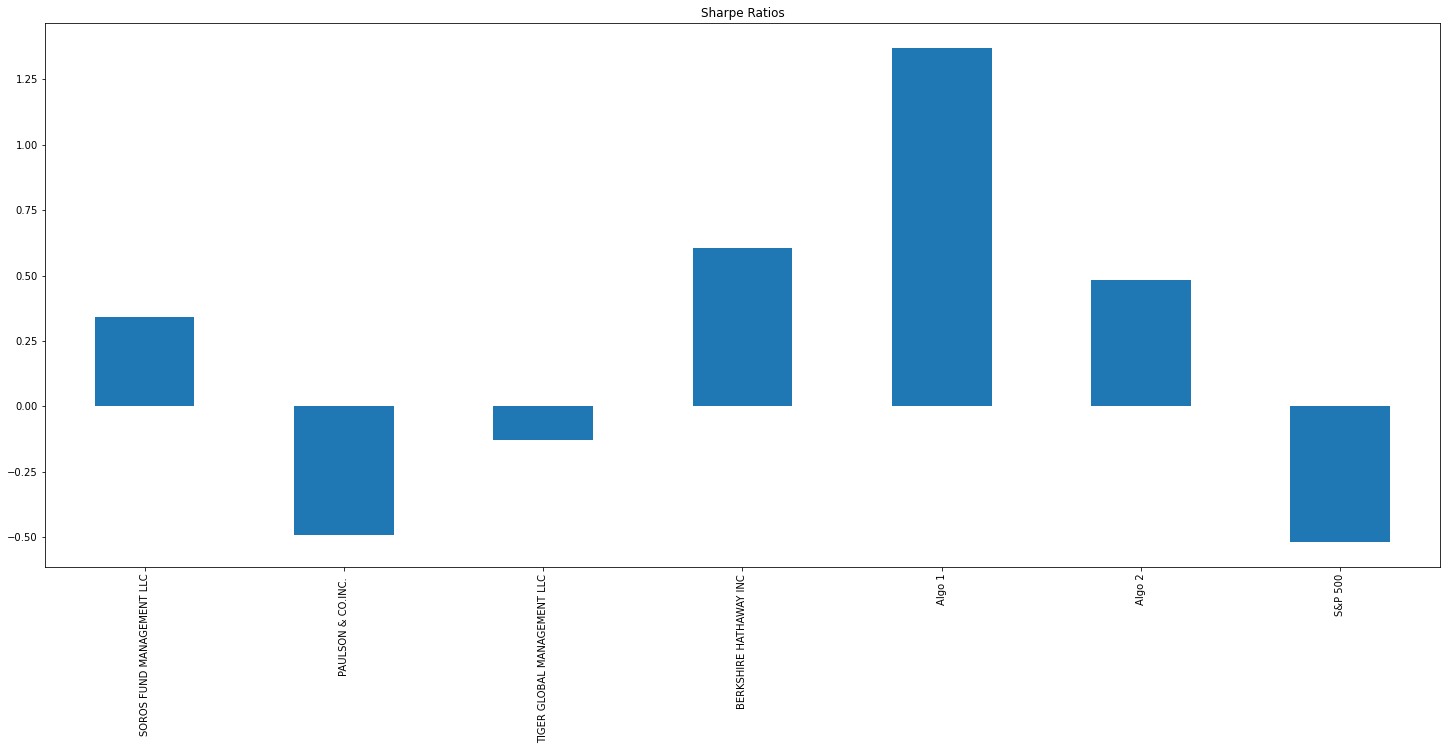

In [77]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", figsize=(25,10), title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithmic Strategy 1 far outperforms the S&P 500 and the whale portfolios. Berkshire Hathaway slightly outperforms Algorithmic Strategy 2 with Soros Fund Management follwing closely behind.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [78]:
# Reading data from 1st stock
amd_path = Path("Resources/my_portfolio/amd_historical.csv")
amd_df = pd.read_csv(amd_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
amd_df.sort_index()

,Close
Date,
2015-01-02,2.69
2015-01-05,2.66
2015-01-06,2.63
2015-01-07,2.58
2015-01-08,2.61
...,...
2021-02-01,87.66
2021-02-02,88.86
2021-02-03,87.89


In [79]:
# Reading data from 2nd stock
amzn_path = Path("Resources/my_portfolio/amzn_historical.csv")
amzn_df = pd.read_csv(amzn_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
amzn_df.sort_index()

,Close
Date,
2015-01-02,308.52
2015-01-05,302.19
2015-01-06,295.29
2015-01-07,298.42
2015-01-08,300.46
...,...
2021-02-01,3342.88
2021-02-02,3380.00
2021-02-03,3312.53


In [80]:
# Reading data from 3rd stock
bidu_path = Path("Resources/my_portfolio/bidu_historical.csv")
bidu_df = pd.read_csv(bidu_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
bidu_df.sort_index()

,Close
Date,
2015-01-02,223.08
2015-01-05,219.79
2015-01-06,220.18
2015-01-07,224.35
2015-01-08,229.21
...,...
2021-02-01,241.89
2021-02-02,250.52
2021-02-03,251.28


In [81]:
# Reading data from 4th stock
meli_path = Path("Resources/my_portfolio/meli_historical.csv")
meli_df = pd.read_csv(meli_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
meli_df.sort_index()

,Close
Date,
2015-01-02,125.85
2015-01-05,124.30
2015-01-06,122.08
2015-01-07,121.84
2015-01-08,123.66
...,...
2021-02-01,1896.79
2021-02-02,1909.99
2021-02-03,1870.52


In [82]:
# Reading data from 5th stock
pypl_path = Path("Resources/my_portfolio/pypl_historical.csv")
pypl_df = pd.read_csv(pypl_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
pypl_df.sort_index()

,Close
Date,
2015-07-06,36.71
2015-07-07,36.62
2015-07-08,34.70
2015-07-09,34.50
2015-07-10,34.69
...,...
2021-02-01,241.85
2021-02-02,249.10
2021-02-03,251.90


In [83]:
# Combine all stocks in a single DataFrame
daily_closing = pd.concat([amd_df, amzn_df, bidu_df, meli_df, pypl_df], axis="columns", join="inner")

In [84]:
# Reset Date index
daily_closing.sort_index()

,Close,Close,Close,Close,Close
Date,,,,,
2015-07-06,2.47,436.04,189.03,135.99,36.71
2015-07-07,2.09,436.72,187.54,135.29,36.62
2015-07-08,2.01,429.70,184.58,129.90,34.70
2015-07-09,1.98,434.39,187.57,133.31,34.50
2015-07-10,1.96,443.51,187.75,135.63,34.69
...,...,...,...,...,...
2021-02-01,87.66,3342.88,241.89,1896.79,241.85
2021-02-02,88.86,3380.00,250.52,1909.99,249.10
2021-02-03,87.89,3312.53,251.28,1870.52,251.90


In [85]:
# Reorganize portfolio data by having a column per symbol
columns = ["AMD", "AMZN", "BIDU", "MELI", "PYPL"]
daily_closing.columns = columns
daily_closing.head()

,AMD,AMZN,BIDU,MELI,PYPL
Date,,,,,
2015-07-06,2.47,436.04,189.03,135.99,36.71
2015-07-07,2.09,436.72,187.54,135.29,36.62
2015-07-08,2.01,429.70,184.58,129.90,34.70
2015-07-09,1.98,434.39,187.57,133.31,34.50
2015-07-10,1.96,443.51,187.75,135.63,34.69


In [86]:
# Calculate daily returns
daily_returns = daily_closing.pct_change()

# Drop NAs
daily_returns.isnull().sum()
daily_returns = daily_returns.dropna()
daily_returns.sort_index()

# Display sample data
daily_returns.head()

,AMD,AMZN,BIDU,MELI,PYPL
Date,,,,,
2015-07-07,-0.153846,0.001559,-0.007882,-0.005147,-0.002452
2015-07-08,-0.038278,-0.016074,-0.015783,-0.039840,-0.052430
2015-07-09,-0.014925,0.010915,0.016199,0.026251,-0.005764
2015-07-10,-0.010101,0.020995,0.000960,0.017403,0.005507
2015-07-13,0.000000,0.027192,0.029401,0.000074,0.060248


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [87]:
# Set weights
weights = [.20, .20, .20, .20 , .20]

# Calculate portfolio return
portfolio_return = daily_returns.dot(weights)

# Display sample data
portfolio_return.head()

Date
2015-07-07   -0.033554
2015-07-08   -0.032481
2015-07-09    0.006535
2015-07-10    0.006953
2015-07-13    0.023383
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [88]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([returns_df, portfolio_return], axis = "columns", join = "inner")
# all_returns = all_returns.rename(columns = {"0" : "My Portfolio Return"})
columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P 500", "My Portfolio"]
all_returns.columns = columns
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
Date,,,,,,,,
2015-07-07,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.016935,-0.033554
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.002257,-0.032481
2015-07-09,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,-0.012188,0.006535
2015-07-10,0.008969,0.003589,0.013605,0.007015,0.003362,0.014381,-0.010945,0.006953
2015-07-13,0.007946,0.001149,0.008658,0.010178,0.004215,0.008575,-0.004438,0.023383


In [89]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.isnull().sum()
all_returns = all_returns.dropna()
all_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
My Portfolio                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [90]:
# Calculate the annualized `std`
all_returns_annual = all_returns.std() * np.sqrt(252)
all_returns_annual

SOROS FUND MANAGEMENT LLC      0.128469
PAULSON & CO.INC.              0.115104
TIGER GLOBAL MANAGEMENT LLC    0.178719
BERKSHIRE HATHAWAY INC         0.211805
Algo 1                         0.123424
Algo 2                         0.135238
S&P 500                        0.138334
My Portfolio                   0.278706
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation For All Portfolios'}, xlabel='Date'>

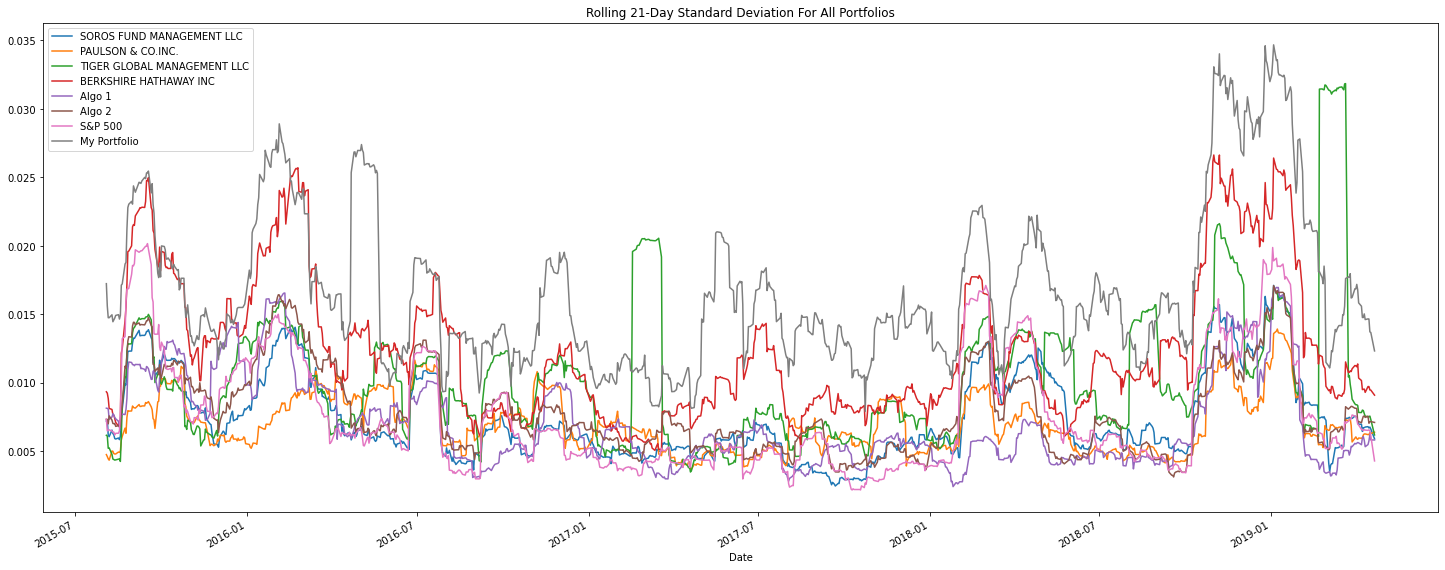

In [91]:
# Calculate rolling standard deviation
all_returns_rolling_std = all_returns.rolling(window=21).std()
# Plot rolling standard deviation
all_returns_rolling_std.plot(figsize=(25,10), title="Rolling 21-Day Standard Deviation For All Portfolios")

### Calculate and plot the correlation

In [92]:
# Calculate and plot the correlation
all_returns_corr = all_returns.corr()
all_returns_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699777,0.554150,0.753524,0.326531,0.827241,-0.000312,0.686022
PAULSON & CO.INC.,0.699777,1.000000,0.427899,0.543223,0.277495,0.679259,0.014393,0.513677
TIGER GLOBAL MANAGEMENT LLC,0.554150,0.427899,1.000000,0.416688,0.166161,0.497090,-0.009155,0.434393
BERKSHIRE HATHAWAY INC,0.753524,0.543223,0.416688,1.000000,0.297278,0.685695,-0.016540,0.734520
Algo 1,0.326531,0.277495,0.166161,0.297278,1.000000,0.298945,-0.038877,0.242641
Algo 2,0.827241,0.679259,0.497090,0.685695,0.298945,1.000000,-0.011205,0.666120
S&P 500,-0.000312,0.014393,-0.009155,-0.016540,-0.038877,-0.011205,1.000000,-0.025764
My Portfolio,0.686022,0.513677,0.434393,0.734520,0.242641,0.666120,-0.025764,1.000000


[Text(0.5, 1.0, 'Correlation of All Portfolio Returns')]

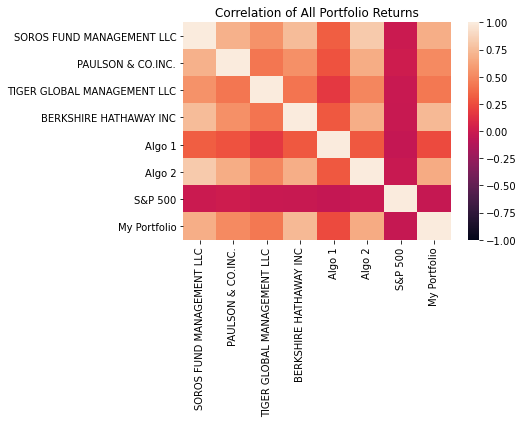

In [93]:
sns.heatmap(all_returns_corr, vmin=-1, vmax=1).set(title="Correlation of All Portfolio Returns")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60-Day Rolling Beta of My Portfolio Daily Returns vs. S&P 500 Daily Returns'}, xlabel='Date'>

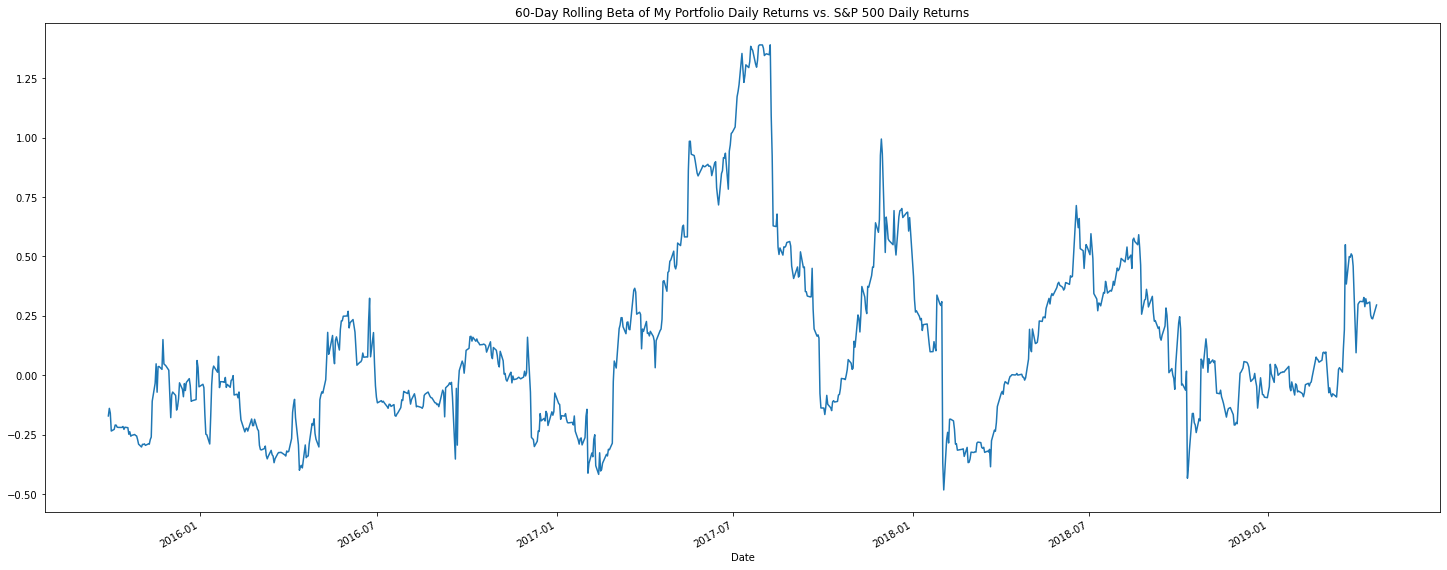

In [94]:
# Calculate and plot Beta
myportfolio_cov = all_returns["My Portfolio"].rolling(window=60).cov(all_returns)["S&P 500"]
sp500_var = all_returns["S&P 500"].rolling(window=60).var()
portfolio_sp500_beta = myportfolio_cov/sp500_var
portfolio_sp500_beta.plot(figsize=(25,10), title="60-Day Rolling Beta of My Portfolio Daily Returns vs. S&P 500 Daily Returns")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [95]:
# Calculate Annualzied Sharpe Ratios
annual_sharpe = (all_returns.mean() * 252) / all_returns_annual
annual_sharpe

SOROS FUND MANAGEMENT LLC      0.360160
PAULSON & CO.INC.             -0.603109
TIGER GLOBAL MANAGEMENT LLC   -0.136251
BERKSHIRE HATHAWAY INC         0.666149
Algo 1                         1.489834
Algo 2                         0.529822
S&P 500                       -0.585725
My Portfolio                   1.495076
dtype: float64

<AxesSubplot:>

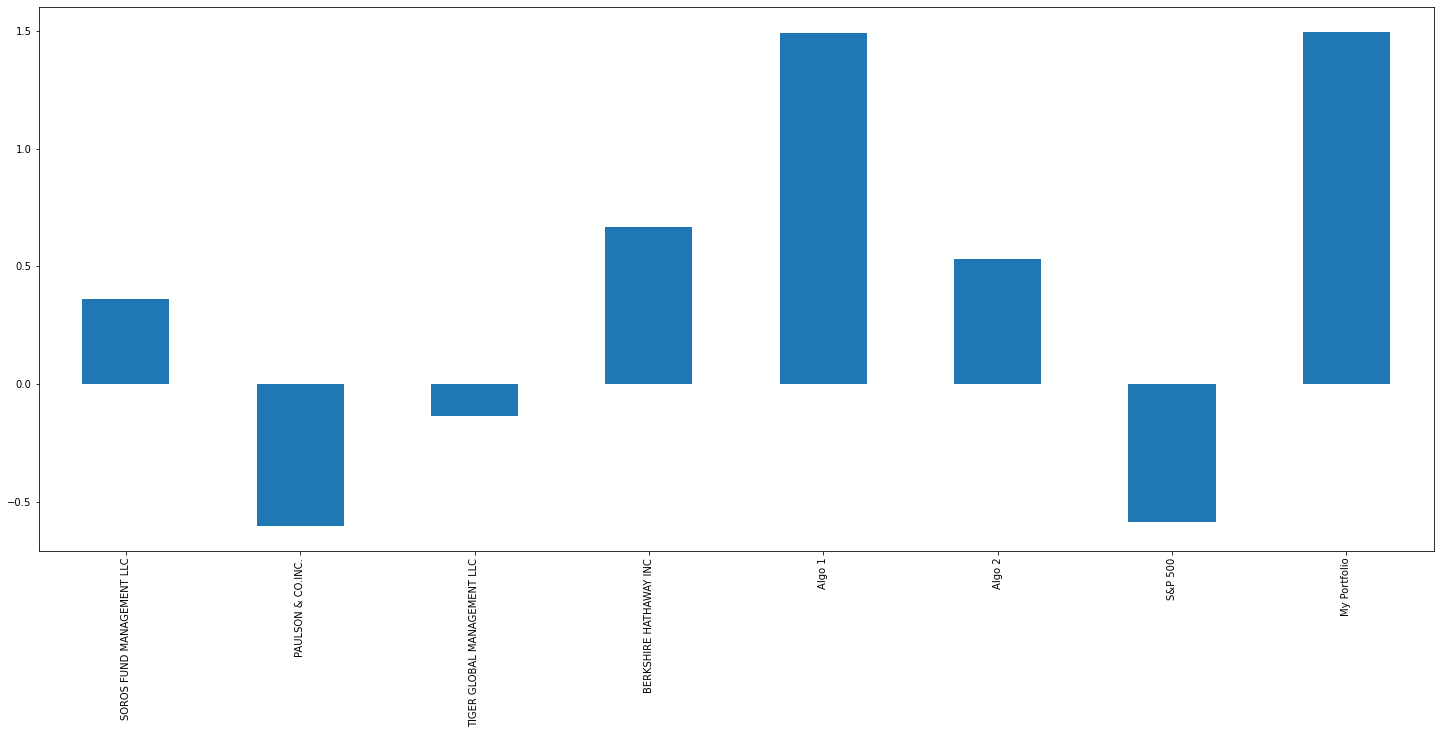

In [96]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe.plot(kind="bar", figsize=(25,10))

### How does your portfolio do?

Outperformed the competition with Algorithmic Strategy 1 coming in close behind.